In [32]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coral Reefs: Impact of Salinity and Temperature  

**Maggie Li**  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

Coral reefs are vital marine ecosystems, providing habitat, biodiversity, and coastal protection. Understanding the environmental factors that influence their distribution is critical for conservation efforts, especially in the face of climate change. I want to investigate the relationship between seawater salinity, temperature, and coral reef distribution on a global scale.

Research Question:
What are the typical ranges of salinity and temperature that support coral reef presence, and are there anomalies in their distribution?


## Data sources:
  - Downloaded from SimonCMAP and NOAA Coral Reef Watch.
  - Data collection process: Data aggregated from satellite observations, buoy measurements, and global coral reef surveys conducted by NOAA and collaborators.
  - Relevant variables included: 
    Salinity (PSU), January and June Temperature (°C), Coral Presence (binary variable), Geographical coordinates (latitude and longitude), Area of the water body (km²).
  - Spatial coverage and resolution: Global, 1-degree grid.
  - Obstacles to data access: Data required preprocessing and cleaning for consistency and merging.
  - URL to dataset: https://simonscmap.com/ https://www.coralreefwatch.noaa.gov/
<br>

## 1. Coral Reef Distribution and Environmental Factors
This section introduces the dataset used for analyzing the relationship between coral reef distribution and environmental variables such as salinity and temperature. The headline of data provides key variables include water salinity, seasonal temperatures (January and June), and geographical coordinates, alongside indicators of coral presence.

In [33]:
file_path = 'corals_worldwide_dataset.csv'
corals_data = pd.read_csv(file_path)

coral_data.rename(columns={'January_temp': 'Temperature_January','June_temp': 'Temperature_June','type of sea': 'Sea_Type','silt/sulfide': 'Silt_Sulfide'
}, inplace=True)

coral_data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Removing outliers
coral_data = coral_data[(coral_data['Temperature_January'] > -2) & (coral_data['Temperature_January'] < 40) &(coral_data['Temperature_June'] > -2) & (coral_data['Temperature_June'] < 40)]

#Setting index
coral_data.reset_index(drop=True, inplace=True)

corals_data.head()

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0


## 2. Mapping Global Coral Reef Distribution

The spatial distribution of coral reefs is visualized by summarizing coral density across different regions. Using geographical coordinates and aggregation techniques, the data is plotted on a global map to highlight areas with high coral presence.

In [34]:
region_density = corals_data.groupby('name').agg({'latitude': 'mean', 'longitude': 'mean', 'corals': 'sum'}).reset_index()

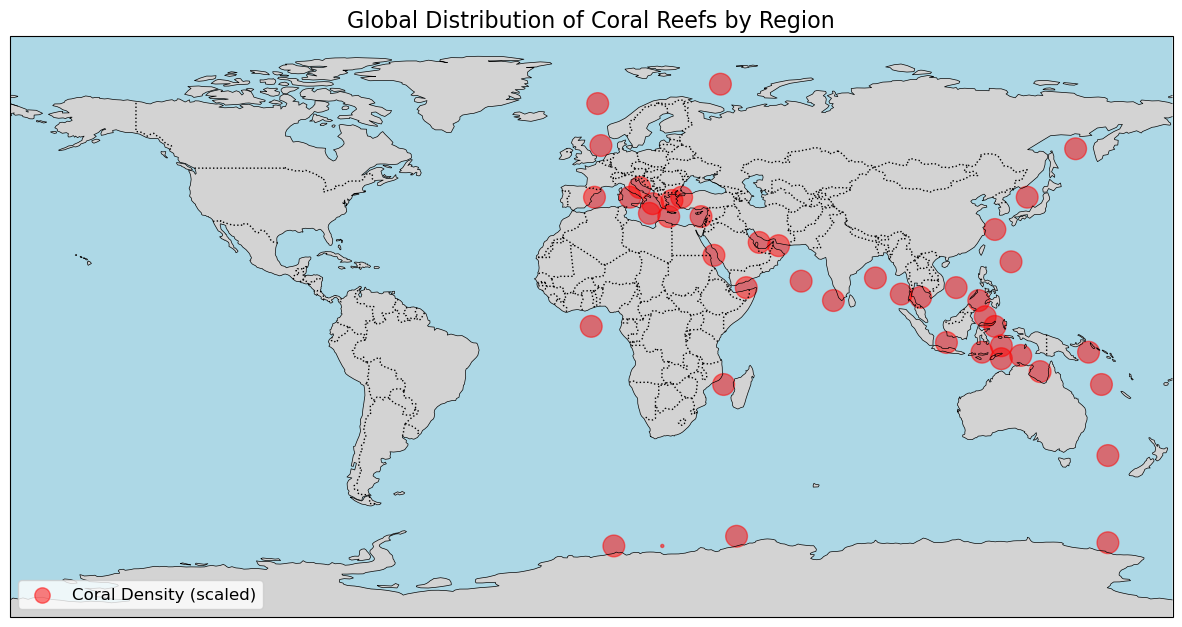

In [35]:
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
scatter = ax.scatter(region_density['longitude'],region_density['latitude'],s=region_density['corals'] * 5,color='red',alpha=0.5,transform=ccrs.PlateCarree(),label='Coral Density')
plt.title('Global Distribution of Coral Reefs by Region', fontsize=16)
plt.legend(handles=[scatter], labels=['Coral Density (scaled)'], loc='lower left', fontsize=12)
plt.show()

**Figure 1 Caption:** This figure visually representing the global distribution of coral reefs and their density across different regions. The map highlights specific areas where coral presence is concentrated, allowing for a clear connection between coral distribution and salinity and temperature. Coral reefs are predominantly concentrated in tropical and subtropical regions, such as the Pacific Ocean and the Indian Ocean.

## 3. Visualizing Salinity and Temperature Distributions
Global distributions of salinity and temperature is mapped. These two key environmental variables influencing coral reef habitats. The salinity map uses color gradients to depict varying salinity levels, while the temperature map visualizes the average temperatures based on January and June data. This helps identify patterns and regions where environmental conditions are most suitable for coral reef growth.

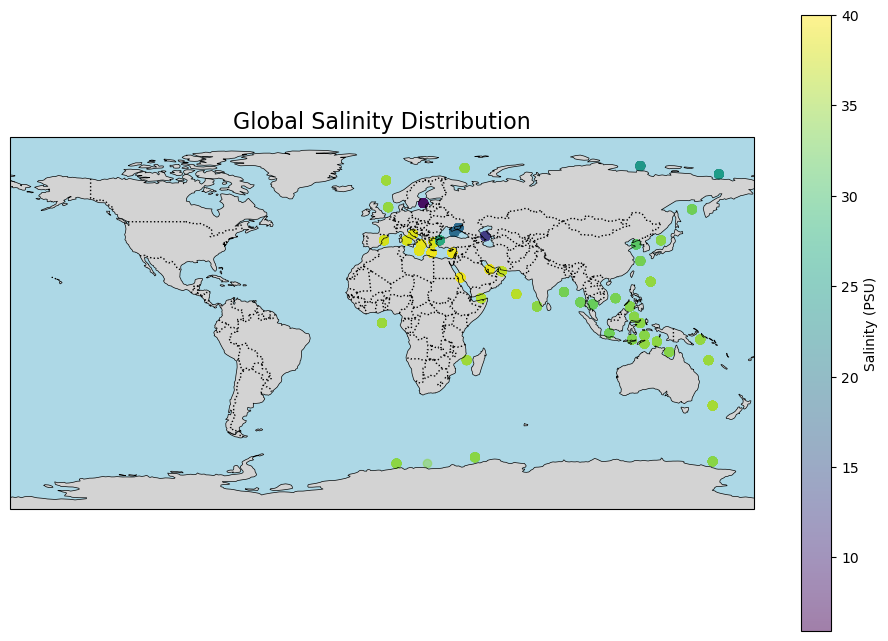

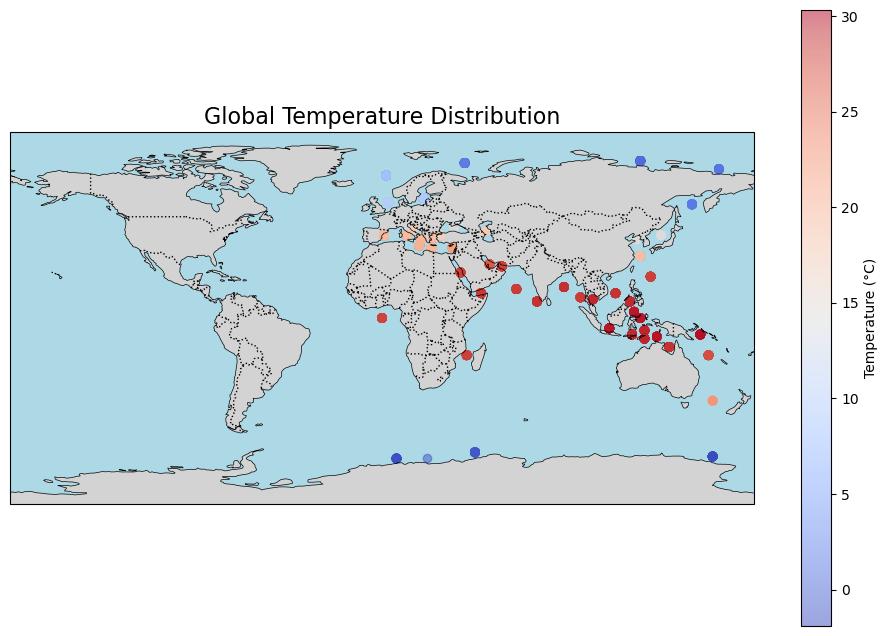

In [48]:
plt.figure(figsize=(12, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_global()

ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
scatter_salinity = ax1.scatter(corals_data['longitude'],corals_data['latitude'],c=corals_data['salinity'],cmap='viridis',alpha=0.5,transform=ccrs.PlateCarree())
plt.colorbar(scatter_salinity, ax=ax1, orientation='vertical', label='Salinity (PSU)')
plt.title('Global Salinity Distribution', fontsize=16)

plt.figure(figsize=(12, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.set_global()
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')

average_temp = (corals_data['January_temp'] + corals_data['June_temp']) / 2
scatter_temp = ax2.scatter(corals_data['longitude'],corals_data['latitude'],c=average_temp,cmap='coolwarm',alpha=0.5,transform=ccrs.PlateCarree())
plt.colorbar(scatter_temp, orientation='vertical', label='Temperature (°C)')
plt.title('Global Temperature Distribution', fontsize=16)

plt.show()

**Figure 2 Caption:** These two maps show the hypothesized environmental ranges: salinity from 30-40 PSU, temperature: 15-30°C, for coral reef presence. They also display patterns and anomalies.

## 4. Exploring the Relationship Between Salinity, Temperature, and Coral Presence
Relationship between salinity, temperature, and coral presence are shown through scatter plot analysis. The regression line is used to explore potential trends between these variables.

In [46]:
corals_data['average_temp'] = (corals_data['January_temp'] + corals_data['June_temp']) / 2

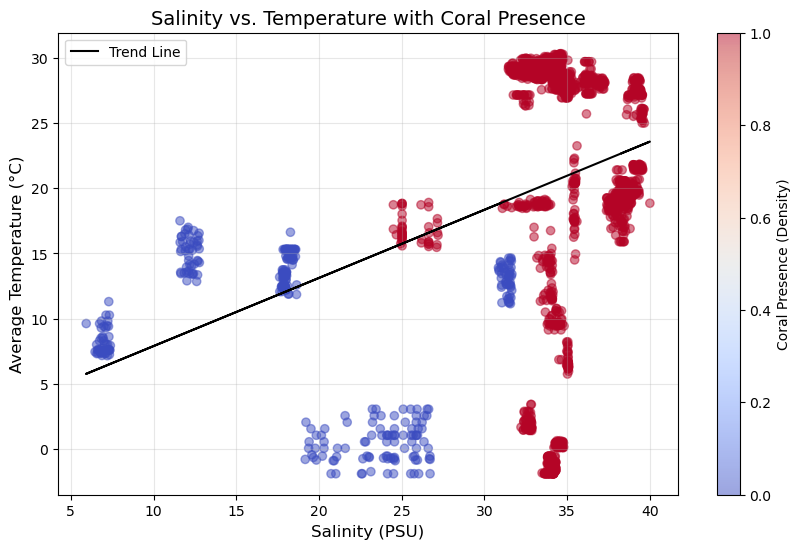

In [47]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(corals_data['salinity'], corals_data['average_temp'], c=corals_data['corals'], cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Coral Presence (Density)')
plt.title('Salinity vs. Temperature with Coral Presence', fontsize=14)
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(alpha=0.3)
coeffs = np.polyfit(corals_data['salinity'], corals_data['average_temp'], 1)
fit_line = np.poly1d(coeffs)
plt.plot(corals_data['salinity'], fit_line(corals_data['salinity']), color='black', label='Trend Line')
plt.legend()

plt.show()

**Figure 3 Caption:** This scatter plot showing the relationship between salinity and average temperature by coral presence. The trend line indicates a weak correlation between these environmental variables. Coral presence is concentrated within salinity ranges of 30-40 PSU and temperatures of 15-30°C.

## Discussion
**Interpretation of Results:**
The results highlight that coral presence is predominantly found within specific salinity: 30-40 PSU. And temperature range: 15-30°C. This suggesting coral's love of stable, moderate environmental conditions. The maps reveal a strong spatial clustering of corals in tropical and subtropical regions. Anomalies, such as coral presence in cooler or less saline waters, might suggest the existence of adaptive species. The scatterplot shows a weak correlation between salinity and temperature, it shows the complexity of factors influencing coral habitats.

**Limitations and Future Work:**
One limitation of this analysis is the reliance on averaged salinity and temperature data, which may not capture seasonal or short-term fluctuations that significantly affect coral health. Additionally, the dataset's spatial resolution might not fully account for other localized variations in environmental conditions, such as freshwater inputs, sedimentation, or pollution. The absence of other critical factors like ocean acidity (pH), nutrient levels might also limits. For future studies, incorporate higher time series data and include more environmental and human impact variables would help.

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

1. **NOAA Coral Reef Watch** . Coral Reef Watch Datasets. NOAA. https://coralreefwatch.noaa.gov

2. **SimonCMAP**. Simon's Collaborative Marine Atlas Platform. https://simonscmap.com

3. **Hoegh-Guldberg, O., et al. (2017).** Coral reefs under rapid climate change and ocean acidification. Science, 318(5857), 1737–1742. https://doi.org/10.1126/science.1152509

4. **Hughes, T. P., et al. (2018).** Global warming transforms coral reef assemblages. Nature, 556(7702), 492–496. https://doi.org/10.1038/s41586-018-0041-2